### Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

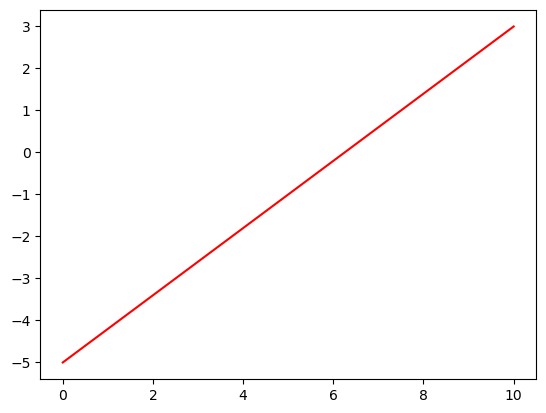

In [3]:
x = np.linspace(0,10,50)

y = 0.8 * x -5
plt.plot(x,y,color = 'red')

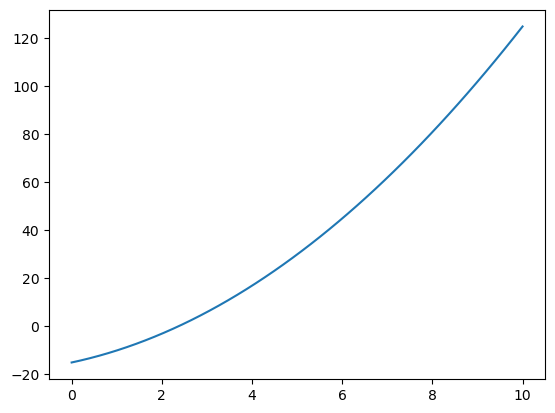

In [4]:
x = np.linspace(0,10,50)

y = x**2 + 4*x - 15

plt.plot(x,y)

### Normal Equation

#### System of Linear Equations with Two Variables"

In [5]:
X = np.array([[1,1],[2,-1]])
X

array([[ 1,  1],
       [ 2, -1]])

In [6]:
y = np.array([14,10])
y

array([14, 10])

In [7]:
# linalg은 선형 대수학에서 사용되는 함수들을 포함하는 모듈입니다. 이 모듈은 다양한 행렬 연산을 수행할 수 있습니다.
# love 함수는 선형 회귀 문제를 계산하는 데 사용됩니다.
np.linalg.solve(X,y)

array([8., 6.])

$f(x,y) = 8x + 6y $

$W = (X^TX)^{-1}X^Ty$ 

In [8]:
A = X.T.dot(X)

In [9]:
# 역행렬
B = np.linalg.inv(A)
B

array([[0.22222222, 0.11111111],
       [0.11111111, 0.55555556]])

In [9]:
C = B.dot(X.T)
C

array([[ 0.33333333,  0.33333333],
       [ 0.66666667, -0.33333333]])

In [10]:
C.dot(y)

array([8., 6.])

#### 3차 선형 방정식 (三元一次方程)

In [11]:
X = np.array([[1,-1,1],[2,1,-1],[3,-2,6]])
X

array([[ 1, -1,  1],
       [ 2,  1, -1],
       [ 3, -2,  6]])

In [12]:
y = np.array([100,80,256])
y

array([100,  80, 256])

In [13]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([ 60., -41.,  -1.])

In [14]:
X

array([[ 1, -1,  1],
       [ 2,  1, -1],
       [ 3, -2,  6]])

In [15]:
X.T

array([[ 1,  2,  3],
       [-1,  1, -2],
       [ 1, -1,  6]])

#### 8차 선형 방정식 (八元一次方程)

In [16]:
# 해당 8차 선형 방정식에 대응하는 X 데이터
X = np.array([[  0 ,14 , 8 ,  0 ,  5,  -2,   9,  -3],
 [ -4 , 10 ,  6 ,  4 ,-14 , -2 ,-14  , 8],
 [ -1 , -6  , 5 ,-12 ,  3 , -3 ,  2 , -2],
 [  5 , -2  , 3 , 10  , 5 , 11 ,  4  ,-8],
 [-15 ,-15  ,-8 ,-15 ,  7 , -4, -12 ,  2],
 [ 11 ,-10 , -2 ,  4  , 3 , -9 , -6 ,  7],
 [-14 ,  0 ,  4 , -3  , 5 , 10 , 13 ,  7],
 [ -3 , -7 , -2 , -8  , 0 , -6 , -5 , -9]])
# 대응y
y = np.array([ 339 ,-114  , 30 , 126, -395 , -87 , 422, -309])
display(X,y)

array([[  0,  14,   8,   0,   5,  -2,   9,  -3],
       [ -4,  10,   6,   4, -14,  -2, -14,   8],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2],
       [  5,  -2,   3,  10,   5,  11,   4,  -8],
       [-15, -15,  -8, -15,   7,  -4, -12,   2],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7],
       [-14,   0,   4,  -3,   5,  10,  13,   7],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9]])

array([ 339, -114,   30,  126, -395,  -87,  422, -309])

In [17]:
# 정규 방정식 (正规方程)
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

### sklearn 알고리즘의 정규 방정식 (正规方程) 사용）

In [10]:
# linear(선형)、model(모델)、algorithm(알고리즘)
# LinearRegression(선형회귀)

from sklearn.linear_model import LinearRegression

In [19]:
# fit_intercept = False 절편(intercept)을 고려하지 않는 경우!!!
model = LinearRegression(fit_intercept = False)#기본값으로 절편을 고려하여 계산하는데, 위의 8차 선형 방정식은 절편이 없으므로 계산할 때 절편을 고려하지 않아야 하므로 False입니다.
# X 데이터；y 목표 값 (目标值)
# X ---> y 어느 정도의 관계가 존재합니다
display(X,y) #8개의 방정식과 8개의 목표 값이 있습니다.
model.fit(X,y)
# coef_ 결과 (结果), 반환 값 (返回值)
# 계수는 기울기, 즉 W입니다. 이것은 방정식의 해를 의미합니다.
model.coef_

# 처음에 제시한 방법과 결과가 일치하지 않는 이유는
# LinearRegression 파라미터에서 fit_intercept는 절편 계산 여부를 나타내는데 기본값으로 계산합니다.
# 그러나 우리가 제공한 8차 선형 방정식은 절편이 없기 때문에 계산할 때 절편을 고려하지 않아야 합니다.
# 따라서 계산할 때 절편을 고려하지 않도록 지정해주어야 합니다.

array([[  0,  14,   8,   0,   5,  -2,   9,  -3],
       [ -4,  10,   6,   4, -14,  -2, -14,   8],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2],
       [  5,  -2,   3,  10,   5,  11,   4,  -8],
       [-15, -15,  -8, -15,   7,  -4, -12,   2],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7],
       [-14,   0,   4,  -3,   5,  10,  13,   7],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9]])

array([ 339, -114,   30,  126, -395,  -87,  422, -309])

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

In [20]:
# 기본적으로 절편을 계산합니다. 
#그러나 위에서 False로 설정했기 때문에 기울기를 계산하지 않으며, 기울기가 0이므로 계산 결과도 0입니다.


model.intercept_

0.0

### 절편을 고려한 선형 방정식.

#### 절편이 12인 선형 방정식.

In [21]:
# array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

$ f(X) = x_1 + 5x_2 + 15x_3 + 3x_4 + 8x_5 + 4x_6 + 17x_7 + 12x_8 + 12$

In [22]:
y = y + 12
y

array([ 351, -102,   42,  138, -383,  -75,  434, -297])

In [23]:
# 指定了fit_intercept = True 정규 방정식을 사용하지 않았습니다.
model = LinearRegression(fit_intercept = True)

# X 데이터와 y 데이터 사이에는 패턴이 존재하며, 이를 적합시켜 찾아내었습니다.
model.fit(X,y)

LinearRegression()

In [24]:
b_ = model.intercept_
b_

26.92820500839804

In [25]:
w_ = model.coef_
w_
#위에서처럼 정규 방정식을 사용하지 않았기 때문에 결과가 약간 다를 수 있습니다.

array([ 3.45714358,  6.90856568, 10.8264159 ,  0.44734523,  6.86091921,
        6.24871714, 17.47728367, 12.78738885])

In [26]:
X.dot(w_) + b_

array([ 351., -102.,   42.,  138., -383.,  -75.,  434., -297.])

#### X 데이터를 수정하다.

In [27]:
X = np.concatenate([X,np.full(shape =(8,1),fill_value=1)],axis=1)
display(X,y)

array([[  0,  14,   8,   0,   5,  -2,   9,  -3,   1],
       [ -4,  10,   6,   4, -14,  -2, -14,   8,   1],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2,   1],
       [  5,  -2,   3,  10,   5,  11,   4,  -8,   1],
       [-15, -15,  -8, -15,   7,  -4, -12,   2,   1],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7,   1],
       [-14,   0,   4,  -3,   5,  10,  13,   7,   1],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9,   1]])

array([ 351, -102,   42,  138, -383,  -75,  434, -297])

In [30]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
display(model.coef_,model.intercept_)

array([-0.28902686,  3.99875919, 17.18947808,  4.3391324 ,  8.59756611,
        2.82031444, 16.74961517, 11.58693282,  4.16860692])

0.0

In [31]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)#正规方程解法

array([  8.7578125 ,   6.72265625,  25.25      , -24.66015625,
        20.97460938,  50.53125   ,   2.09277344,  17.50976562,
       -14.46875   ])